# Timeshift

In [92]:
import numpy as np
import bisect
import matplotlib.pyplot as plt
import pimc # custom module
from scipy.stats import truncexpon
from scipy.integrate import quad, simps

### Simulation parameters

In [138]:
# Simulation parameters
N = 2
L = N*2   # half-filling
t = 0
U = 3
mu = -0.1
    
# PIMC parameters
beta = 1
eta = 1/np.sqrt(L*beta)      # worm end fugacity

### Create a worldline configuration (with a worm)

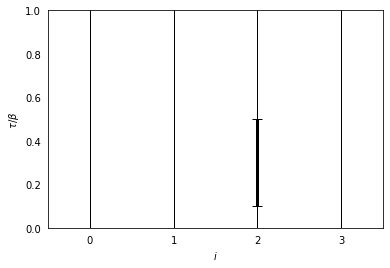

In [139]:
# Create a worldline configuration
alpha = [1,1,1,1]
data_struct = pimc.create_data_struct(alpha)
head_loc = []
tail_loc = []

# Insert a worm or antiworm
i = 2
n_i = alpha[i]
tau_t = 0.1
tau_h = 0.5
if tau_t < tau_h:
    data_struct[i].append([tau_t,n_i+1,(i,i)])
    data_struct[i].append([tau_h,n_i,(i,i)])
    tail_loc = [i,1]
    head_loc = [i,2]
else: # antiworm
    data_struct[i].append([tau_h,n_i-1,(i,i)])
    data_struct[i].append([tau_t,n_i,(i,i)]) 
    head_loc = [i,1]
    head_loc = [i,2]

pimc.view_worldlines(data_struct,beta,figure_name=None)

### Do many timeshifts

In [140]:
# Do timeshift many times on the above configuration
mc_steps = int(1E+05)
worm_lengths = np.zeros(mc_steps)  # create array to save worm lengths
accepted = 0
rejected = 0
for m in range(mc_steps):
    tau_1 = data_struct[head_loc[0]][head_loc[1]][0]
    tau_2 = data_struct[tail_loc[0]][tail_loc[1]][0]
    worm_length = abs(tau_1-tau_2)
    worm_lengths[m] = worm_length
        
    pimc.worm_timeshift(data_struct,beta,head_loc,tail_loc, U, mu)
    
    # Count accepted updates  
    if tau_1 != data_struct[head_loc[0]][head_loc[1]][0] or (
       tau_2 != data_struct[tail_loc[0]][tail_loc[1]][0] ):
        accepted += 1

    # Count rejected updates  
    if tau_1 == data_struct[head_loc[0]][head_loc[1]][0] and (
       tau_2 == data_struct[tail_loc[0]][tail_loc[1]][0] ):
        rejected += 1

# Print the number of accepted time shifts
print("Accepted: %.4f %%"%(accepted/mc_steps*100))
print("Rejected: %.4f %%"%(rejected/mc_steps*100))

Accepted: 100.0000 %
Rejected: 0.0000 %


### Histogram of worm lengths

pdf[0] 2.7801296745901496


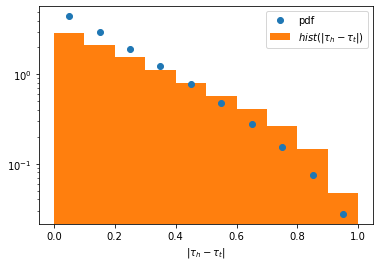

In [164]:
# Histogram of worm lengths
loc = 0
b = 1
scale = 1/abs(U-mu)

# Truncated exponential
x = np.linspace(-0.6+loc,loc+b+0.6,1000)

# Histogram
#print("Bins: ",bins[:5])
a = np.arange(0,1,0.1)
a = np.linspace(0,1,int(1E+01+1))
n, bins = np.histogram(worm_lengths, bins=a, density=1) # x = bins
a = (a[1:]+a[0:-1])/2
#print("bins: ",bins)
x = a
#print("a: ",a)
pdf = truncexpon.pdf(x,b=b/scale,loc=loc,scale=scale)
dtau = x[1]-x[0] # bin_width
pdf *= (1-(x-dtau/2))
print("pdf[0]",pdf[0])
pdf /= simps(pdf,x)
#print("pdf: ", pdf)

#pdf *= (1/x-1)
#pdf *= (1-x)/(x+bins[0])
#dtau = 0.5*(bins[:-1]+bins[1:])
#bins = np.linspace(0,1,100)

# Integrate the pdf
#norm = sum(pdf)*dtau
#pdf /= norm
#print("Normalization of x: ", sum(pdf)*dtau)

#norm = simps(pdf,x)
#print("Norm: %.8f"%norm)
#pdf/=norm
#norm = simps(pdf,x)
#print("Norm: %.8f"%norm)

fig, ax = plt.subplots(1, 1)
ax.plot(x,pdf,label='pdf',linestyle='None',marker='o')
ax.hist(worm_lengths,bins=bins,density=True,histtype='stepfilled',alpha=1,label=r'$hist(\vert\tau_h-\tau_t\vert)$')
ax.set_xlabel(r"$\vert \tau_h - \tau_t \vert $") ;
ax.set_yscale("log");
plt.legend(loc='best')
#plt.savefig("%d_%d_%.4f_%.4f_%.4f_%d.pdf"%(L,N,U,mu,t,mc_steps))

### Create a worldline configuration (with an antiworm)

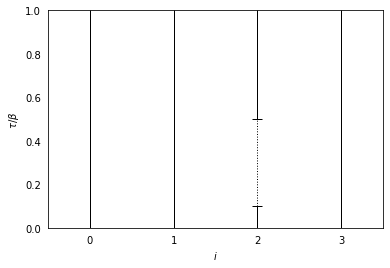

In [79]:
# Create a worldline configuration
alpha = [1,1,1,1]
data_struct = pimc.create_data_struct(alpha)
head_loc = []
tail_loc = []

# Insert a worm or antiworm
i = 2
n_i = alpha[i]
tau_t = 0.5
tau_h = 0.1
if tau_t < tau_h:
    data_struct[i].append([tau_t,n_i+1,(i,i)])
    data_struct[i].append([tau_h,n_i,(i,i)])
    tail_loc = [i,1]
    head_loc = [i,2]
else: # antiworm
    data_struct[i].append([tau_h,n_i-1,(i,i)])
    data_struct[i].append([tau_t,n_i,(i,i)]) 
    head_loc = [i,1]
    tail_loc = [i,2]

pimc.view_worldlines(data_struct,beta,figure_name=None)

### Do many timeshifts

In [80]:
# Do timeshift many times on the above configuration
mc_steps = int(1E+05)
antiworm_lengths = np.zeros(mc_steps)  # create array to save worm lengths
accepted = 0
rejected = 0
for m in range(mc_steps):
    tau_1 = data_struct[head_loc[0]][head_loc[1]][0]
    tau_2 = data_struct[tail_loc[0]][tail_loc[1]][0]
    worm_length = abs(tau_1-tau_2)
    antiworm_lengths[m] = worm_length
        
    pimc.worm_timeshift(data_struct,beta,head_loc,tail_loc, U, mu)
    
    # Count accepted updates  
    if tau_1 != data_struct[head_loc[0]][head_loc[1]][0] or (
       tau_2 != data_struct[tail_loc[0]][tail_loc[1]][0] ):
        accepted += 1

    # Count rejected updates  
    if tau_1 == data_struct[head_loc[0]][head_loc[1]][0] and (
       tau_2 == data_struct[tail_loc[0]][tail_loc[1]][0] ):
        rejected += 1

# Print the number of accepted time shifts
print("Accepted: %.4f %%"%(accepted/mc_steps*100))
print("Rejected: %.4f %%"%(rejected/mc_steps*100))

Accepted: 100.0000 %
Rejected: 0.0000 %


### Histogram of antiworm lengths

Bins:  [2.85349716e-06 9.96707750e-03 1.99313015e-02 2.98955255e-02
 3.98597495e-02]


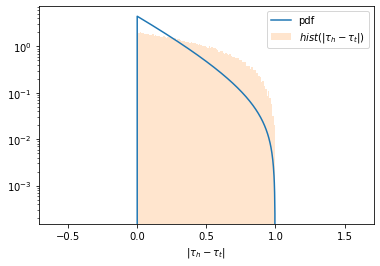

In [143]:
# Histogram of worm lengths
loc = 0
b = 1
scale = 1/abs(U-mu)

# Truncated exponential
x = np.linspace(-0.6+loc,loc+b+0.6,1000)

# Histogram
print("Bins: ",bins[:5])
n, bins = np.histogram(antiworm_lengths, bins=100, density=1) # x = bins
pdf = truncexpon.pdf(x,b=b/scale,loc=loc,scale=scale)
dtau = x[1]-x[0] # bin_width
pdf *= (1-x-dtau)
pdf /= simps(pdf,x)

#pdf *= (1/x-1)
#pdf *= (1-x)/(x+bins[0])
#dtau = 0.5*(bins[:-1]+bins[1:])
#bins = np.linspace(0,1,100)

# Integrate the pdf
#norm = sum(pdf)*dtau
#pdf /= norm
#print("Normalization of x: ", sum(pdf)*dtau)

#norm = simps(pdf,x)
#print("Norm: %.8f"%norm)
#pdf/=norm
#norm = simps(pdf,x)
#print("Norm: %.8f"%norm)


fig, ax = plt.subplots(1, 1)
ax.plot(x,pdf,label='pdf')
ax.hist(antiworm_lengths,bins=100,density=True,histtype='stepfilled',alpha=0.2,label=r'$hist(\vert\tau_h-\tau_t\vert)$')
ax.set_xlabel(r"$\vert \tau_h - \tau_t \vert $") ;
ax.set_yscale("log");
plt.legend(loc='best')
#plt.savefig("%d_%d_%.4f_%.4f_%.4f_%d.pdf"%(L,N,U,mu,t,mc_steps))

### Maybe we'll need this. Keep for now

Normalizatio of bins??:  0.9999999999999999
n_loc: [1.19497938e+02 3.91795010e+01 2.31093238e+01 1.62214426e+01
 1.23946701e+01 9.95938732e+00 8.27339324e+00 7.03698244e+00
 6.09148318e+00 5.34503111e+00 4.74075696e+00 4.24157167e+00
 3.82225441e+00 3.46505706e+00 3.15712745e+00 2.88893005e+00
 2.65324093e+00 2.44448731e+00 2.25830135e+00 2.09121114e+00
 1.94042221e+00 1.80365999e+00 1.67905428e+00 1.56505319e+00
 1.46035822e+00 1.36387454e+00 1.27467258e+00 1.19195797e+00
 1.11504785e+00 1.04335193e+00 9.76357335e-01 9.13616336e-01
 8.54736291e-01 7.99371445e-01 7.47216133e-01 6.97999127e-01
 6.51478925e-01 6.07439784e-01 5.65688375e-01 5.26050948e-01
 4.88370913e-01 4.52506771e-01 4.18330345e-01 3.85725239e-01
 3.54585522e-01 3.24814577e-01 2.96324096e-01 2.69033207e-01
 2.42867710e-01 2.17759400e-01 1.93645473e-01 1.70468005e-01
 1.48173483e-01 1.26712398e-01 1.06038872e-01 8.61103341e-02
 6.68872282e-02 4.83327492e-02 3.04126086e-02 1.30948232e-02]
n_prime_area:  2.030286531754686


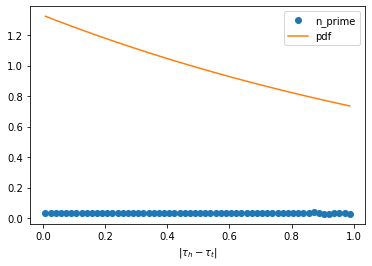

In [100]:
# Get the largest and smallest worm length
min_length = np.min(worm_lengths)
max_length = np.max(worm_lengths)

# Histogram of wormlengths
loc = 0
b = 1
scale = 1/abs(U-mu)

x = np.linspace(-0.6+loc,loc+b+0.6,1000)

n, bins = np.histogram(worm_lengths, bins=60, density=1)
print("Normalizatio of bins??: ", sum(n*(bins[1]-bins[0])))
dtau = 0.5*(bins[:-1]+bins[1:])
pdf = truncexpon.pdf(dtau,b=b/scale,loc=loc,scale=scale)
n_loc = (1-dtau)/dtau
n_prime = n/n_loc
n_prime /= (np.sum(n_prime)*dtau)

print("n_loc:", n_loc)

#pdf_area = quad(n_prime,0,1)
#print("pdf area: ", pdf)
print("n_prime_area: ", np.sum(n_prime))
print("pdf_area: ", np.sum(pdf))

fig, ax = plt.subplots(1, 1)
ax.plot(dtau,n_prime,"o",label="n_prime")
ax.plot(dtau,pdf,label='pdf')
#ax.plot(dtau,n_loc,label='n_loc')
#ax.plot(dtau,n_loc/pdf/n,label='n_loc/pdf/n')
#ax.hist(worm_lengths,bins=bins,density=True,histtype='stepfilled',alpha=0.2) 
ax.set_xlabel(r"$\vert \tau_h - \tau_t \vert $") ;
#ax.set_yscale("log");
plt.legend()
#plt.savefig("%d_%d_%.4f_%.4f_%.4f_%d.pdf"%(L,N,U,mu,t,mc_steps))